## Аналитика в авиакомпании

Мы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.  
Нам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

### <a name="0.0"></a> Оглавление
* [0. Описание данных и задачи](#0.)
* [1. Изучение общей информации](#1.)
* [2. Проверить типы данных на корректность](#2.)
* [3. Выбрать топ-10 городов по количеству рейсов](#3.)
* [4. Построить графики](#4.)
    - [4.1. Модели самолетов и количество рейсов](#4.1.)
    - [4.2. Город и количество рейсов](#4.2.)
    - [4.3. Топ-10 городов и количество рейсов](#4.3.)
* [5. Выводы по каждому из графиков](#5.)
   

### <a name="0."></a> Описание данных
<font>[к Оглавлению](#0.0)</font>

#### Результат первого запроса.
В нём содержится информация о:
- **model** — модели самолета
- **flights_amount** — количество рейсов для каждой модели самолетов model в сентябре 2018 года

#### Результат третьего запроса. 
В нём содержится информация о:
- **city** — городах
- **average_flights** — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

### Нам нужно:
* импортировать файлы;
* изучить данные в них;
* проверить типы данных на корректность;
* выбрать топ-10 городов по количеству рейсов;
* построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
* сделать выводы по каждому из графиков, пояснить результат.

## <a name="1."></a>Шаг 1. Откроем файл с данными и изучим общую информацию. 
<font>[к Оглавлению](#0.0)</font>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

In [2]:
df = pd.read_csv('/datasets/query_1.csv')
df2 = pd.read_csv('/datasets/query_3.csv')

Посмотрим на две таблицы, как они выглядят и какие данные там есть. Изучим метод `info()` для просмотра сводной информации о таблице. Изучим описание данных для числовых колонок методом `describe`.

Первый запрос. В нём содержится информация о модели самолета и количестве рейсов для каждой модели самолетов в сентябре 2018 года

In [3]:
display(df.head(8), df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


None

,flights_amount
count,8.000000
mean,2035.625000
std,1965.203947
min,300.000000
25%,605.250000
50%,795.000000
75%,4250.250000
max,4557.000000


Третий запрос. В нём содержится информация о городах и среднем количестве рейсов, прибывающих в город за день в августе 2018 года

In [4]:
display(df2.head(), df2.info(), df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613


None

,average_flights
count,101.000000
mean,5.494189
std,13.119790
min,1.000000
25%,2.000000
50%,3.000000
75%,5.870968
max,129.774194


In [5]:
df2.query('average_flights > 20')

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290


## <a name="2."></a> 2. Проверить типы данных на корректность
<font>[к Оглавлению](#0.0)</font>

Данные чистые, без пропусков и посторонних данных.  
Типы данных соответсвуют нашим потребностям.  
В столбце `model` данные имеют подходящий нам текстовый формат (object), значения в столбце `flights_amount` (int64) целочисленные.  
В столбце `city` данные имеют подходящий нам текстовый формат (object), значения в столбце `average_flights` (float64) вещественные, с числом после запятой.  
Округлим среднее количество рейсов `average_flights` до 2х знаков после запятой.


In [6]:
df2['average_flights'] = round(df2['average_flights'],2)

## <a name="3."></a> 3. Выбрать топ-10 городов по количеству рейсов
<font>[к Оглавлению](#0.0)</font>

Найдем топ-10 городов, по количесву рейсов, прибывающих туда за день, в августе 2018 года

In [7]:
df_city = (df2.pivot_table(index='city', values='average_flights', aggfunc='sum')
              .sort_values('average_flights', ascending=False))

In [8]:
top10_city = df_city.head(10)
top10_city

,average_flights
city,
Москва,129.77
Санкт-Петербург,31.16
Новосибирск,17.32
Красноярск,11.58
Екатеринбург,11.32
Ростов-на-Дону,10.19
Пермь,10.13
Брянск,10.00
Сочи,9.61


## <a name="4."></a> 4. Построить графики
<font>[к Оглавлению](#0.0)</font>

### <a name="4.1."></a> 4.1. Модели самолетов и количество рейсов
<font>[к Оглавлению](#0.0)</font>

Построим график о количестве рейсов для каждой модели самолетов в сентябре 2018 года

In [9]:
model_flights = (df.pivot_table(index='model', values='flights_amount', aggfunc='sum')
                 .sort_values('flights_amount', ascending=True))
model_flights

,flights_amount
model,
Boeing 777-300,300
Boeing 767-300,600
Airbus A319-100,607
Boeing 737-300,630
Airbus A321-200,960
Sukhoi SuperJet-100,4185
Bombardier CRJ-200,4446
Cessna 208 Caravan,4557


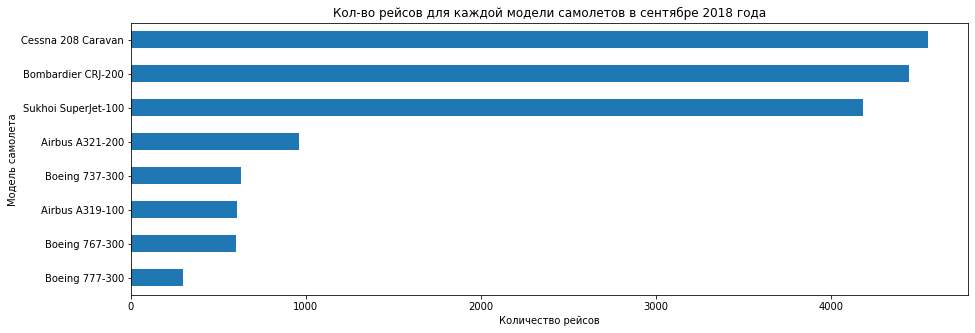

In [10]:
(model_flights
 .plot(kind='barh', y='flights_amount', figsize=(15, 5), legend=False, 
       title='Кол-во рейсов для каждой модели самолетов в сентябре 2018 года')
 .set(xlabel='Количество рейсов', ylabel='Модель самолета')
)
plt.show()

### <a name="4.2."></a> 4.2. Город и количество рейсов
<font>[к Оглавлению](#0.0)</font>

Посмотрим как распределны рейсы по всем городам.

In [12]:
display(df_city['average_flights'].reset_index()
        .describe(percentiles=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.98, 0.99]).T)

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,95%,98%,99%,max
average_flights,101.0,5.493663,13.119346,1.0,1.0,1.59,2.0,2.59,3.0,3.9,4.87,6.03,9.0,10.19,17.32,31.16,129.77


Городов много и кол-во рейсов различное, разобъем на три графика. Графики построим по убыванию количества рейсов.

Первый график. 5% от общего кол-ва данных и до 10 рейсов в день.

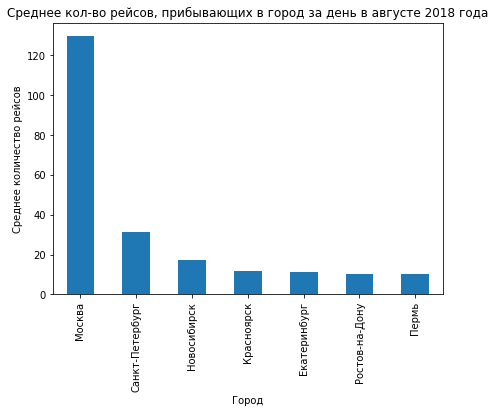

In [13]:
(df_city
 .query('average_flights > 10')
 .plot(kind='bar', y='average_flights', figsize=(7, 5), legend=False, 
       title='Среднее кол-во рейсов, прибывающих в город за день в августе 2018 года')
 .set(xlabel='Город', ylabel='Среднее количество рейсов')
)
plt.show()

Второй график. 45% от общего кол-ва данных и от 10 рейсов до 3 рейсов в день.

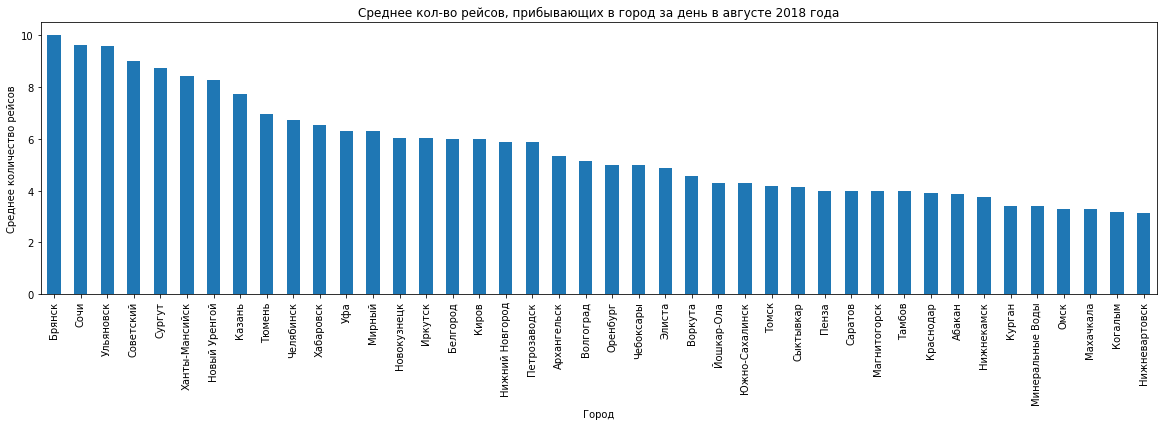

In [14]:
(df_city
 .query('average_flights > 3 and average_flights <= 10')
 .plot(kind='bar', y='average_flights', figsize=(20, 5), legend=False, 
       title='Среднее кол-во рейсов, прибывающих в город за день в августе 2018 года')
 .set(xlabel='Город', ylabel='Среднее количество рейсов')
)
plt.show()

Третий график. 50% от общего кол-ва данных и от 3 рейсов до 1 рейса в день.

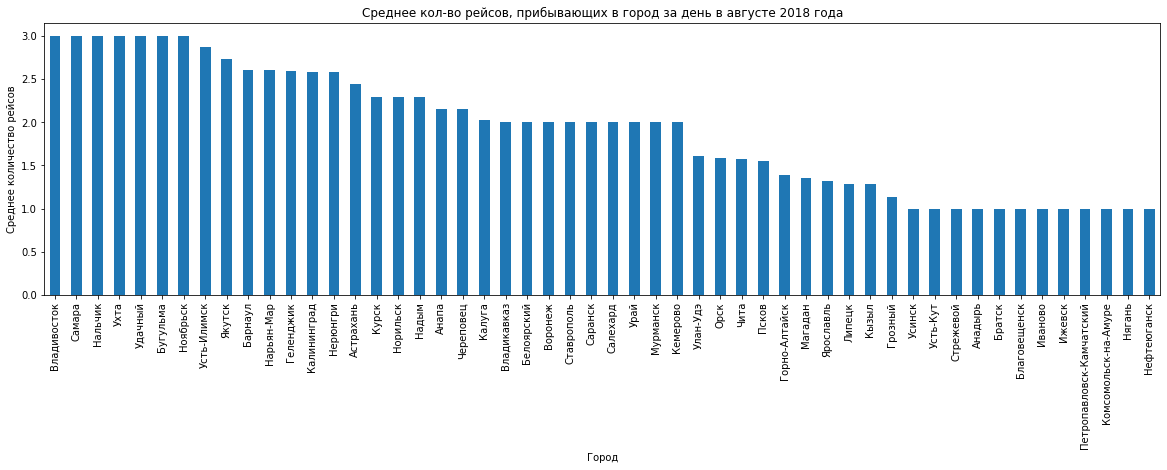

In [15]:
(df_city
 .query('average_flights > 0 and average_flights <= 3')
 .plot(kind='bar', y='average_flights', figsize=(20, 5), legend=False, 
       title='Среднее кол-во рейсов, прибывающих в город за день в августе 2018 года')
 .set(xlabel='Город', ylabel='Среднее количество рейсов')
)
plt.show()

### <a name="4.3."></a> 4.3. Топ-10 городов и количество рейсов
<font>[к Оглавлению](#0.0)</font>

Построим график топ-10 городов по количеству рейсов, прибывающих в город за день в августе 2018 года

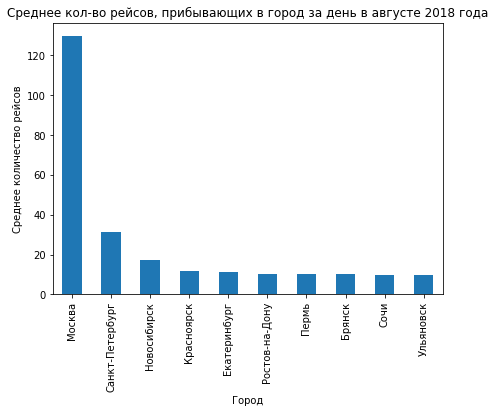

In [16]:
(top10_city
 .plot(kind='bar', y='average_flights', figsize=(7, 5), legend=False, 
       title='Среднее кол-во рейсов, прибывающих в город за день в августе 2018 года')
 .set(xlabel='Город', ylabel='Среднее количество рейсов')
)
plt.show()

## <a name="5."></a> 5. Выводы по каждому из графиков
<font>[к Оглавлению](#0.0)</font>

Мы изучили и выяснили следующее:

Самыми используемыми моделями самолета (в сентябре 2018г.) являются Cessna 208 Caravan, Bombardier CRJ-200 и Sukhoi SuperJet-100  

Популярность первых двух обусловлена малой вместимостью. Cessna 208 Caravan до 15 человек, Bombardier CRJ-200 до 55 человек. Скорей всего такие самолеты используются для перевозки в отдаленные районы центральной России, где пассажиропоток небольшой. 

Третий самолет - Sukhoi SuperJet-100  уже вместимостью до 100 человек.  

Остальные самолеты в рейтинге вместимостью более 125 пассажиров и предназначены для перевозки большого количества человек, между крупными городами. От этого и различие в количестве рейсов. Если сравнить количестов перевезенных пассажиров, то данные могут поменяться.

Есть два города Москва и Санкт-Петербург, которые принимают самое большое количестово рейсов. Они являются 1% от всех городов, куда летают самолеты, но обеспечивают почти 30% всех рейсов

In [17]:
df_mos = df_city.query('city == "Москва"')['average_flights'].sum()/df_city['average_flights'].sum()
df_pit = df_city.query('city == "Санкт-Петербург"')['average_flights'].sum()/df_city['average_flights'].sum()
print('Доля Москвы в кол-ве рейсов {:.1%}'.format(df_mos))
print('Доля Питера в кол-ве рейсов {:.1%}'.format(df_pit))

Доля Москвы в кол-ве рейсов 23.4%
Доля Питера в кол-ве рейсов 5.6%


Количество рейсов в Москве за день, можно объяснить транзитным движением, пересадками. Движение самолетов организовано из районов страны в Москву и из Москвы в районы страны. Единицы рейсов, которые из города в город, минуя Москву.

Третье и четвертое место в топ-10 городов с самым большим кол-вом рейсов занимают города Новосибирск и Красноярск. Они тоже являются пунктами пересадки, с дальневосточных рейсов и большие расстояния между городов, в этих местах, способствуют к увеличению воздушного авиосообщения на самолетах малой вместимости.
